In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import charset_normalizer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-booking-csv/customer_booking.csv


In [54]:
with open('/kaggle/input/airlines-booking-csv/customer_booking.csv', 'rb') as fle:
    result = charset_normalizer.detect(fle.read(100000))
    print(result)

{'encoding': 'windows-1250', 'language': 'Czech', 'confidence': 1.0}


In [55]:
df = pd.read_csv('/kaggle/input/airlines-booking-csv/customer_booking.csv', encoding='windows-1250')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [57]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [62]:
df.duplicated().sum()

719

In [63]:
df[df.duplicated(keep=False)]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
115,1,Internet,RoundTrip,65,278,2,Thu,AKLKUL,Malaysia,0,0,0,8.83,0
117,1,Internet,RoundTrip,263,58,4,Sun,AKLKUL,Malaysia,0,1,0,8.83,0
122,1,Internet,RoundTrip,42,17,14,Tue,AKLKUL,Malaysia,0,0,0,8.83,1
135,4,Internet,RoundTrip,366,17,16,Sun,AKLKUL,Malaysia,1,0,1,8.83,0
177,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49905,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49911,1,Internet,RoundTrip,30,6,7,Thu,PENTPE,Taiwan,0,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0


In [66]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


<Axes: >

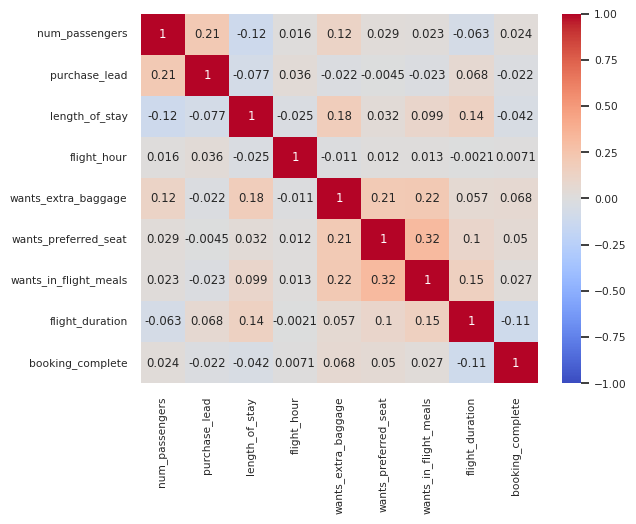

In [67]:
sns.set(font_scale=.7)
sns.heatmap(df.select_dtypes('number').corr(),annot=True,vmin=-1,vmax=1,center=0, cmap='coolwarm')

In [68]:
df.select_dtypes('object').describe()

,sales_channel,trip_type,flight_day,route,booking_origin
count,50000,50000,50000,50000,50000
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44382,49497,8102,2680,17872


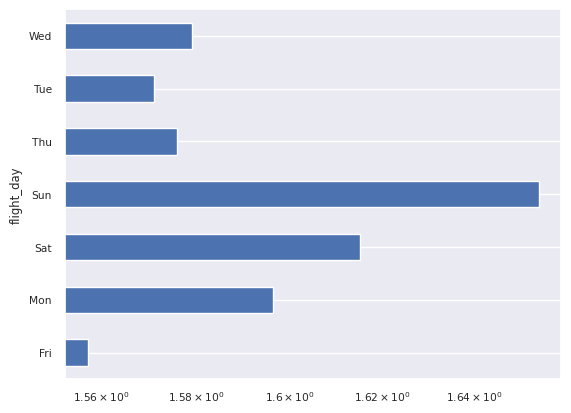

In [69]:
df.groupby('flight_day')['num_passengers'].mean().plot.barh()
plt.xscale('log')

In [70]:
days = list(df.flight_day.unique())
day = {}
for i in days:
    day[i] = df.loc[df.flight_day==i]


In [71]:
from scipy.stats import f_oneway
result = f_oneway(day['Sat']['num_passengers'],day['Sun']['num_passengers'],
                 day['Mon']['num_passengers'],day['Tue']['num_passengers'],
                 day['Wed']['num_passengers'],day['Thu']['num_passengers'],
                 day['Fri']['num_passengers'])
result

F_onewayResult(statistic=6.9551461098259315, pvalue=2.092930015258372e-07)

In [72]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [73]:
result2 = pairwise_tukeyhsd(df['num_passengers'],df['flight_day'])
print(result2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Mon   0.0391 0.2305 -0.0104  0.0886  False
   Fri    Sat   0.0579 0.0251  0.0042  0.1117   True
   Fri    Sun   0.0971    0.0   0.045  0.1492   True
   Fri    Thu   0.0187 0.9316 -0.0319  0.0692  False
   Fri    Tue   0.0139 0.9831 -0.0362  0.0641  False
   Fri    Wed   0.0219 0.8571 -0.0282  0.0721  False
   Mon    Sat   0.0188 0.9357 -0.0329  0.0705  False
   Mon    Sun    0.058 0.0111   0.008  0.1079   True
   Mon    Thu  -0.0204 0.8755 -0.0687  0.0279  False
   Mon    Tue  -0.0252 0.7143 -0.0731  0.0227  False
   Mon    Wed  -0.0172 0.9403 -0.0651  0.0307  False
   Sat    Sun   0.0392 0.3344  -0.015  0.0933  False
   Sat    Thu  -0.0393 0.2961 -0.0919  0.0134  False
   Sat    Tue   -0.044 0.1658 -0.0963  0.0083  False
   Sat    Wed   -0.036 0.3951 -0.0883  0.0163  False
   Sun    Thu  -0.0784 0.0001 -0.1294 -0.0275 

<Axes: >

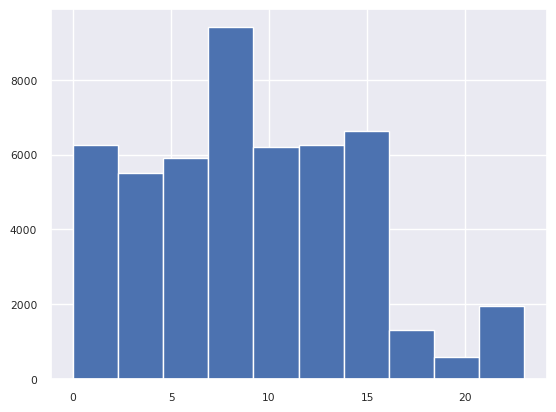

In [74]:
df.flight_hour.hist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='flight_hour', ylabel='Count'>

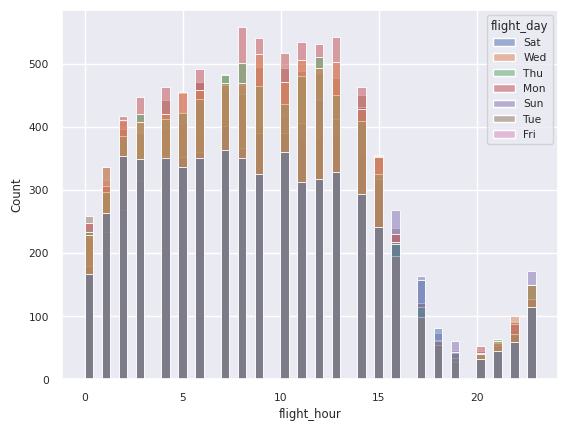

In [75]:
sns.histplot(data=df,x='flight_hour',hue='flight_day')

**Question**: 
Is there a difference in the mean flight duration between one-way and round trip flights?

**Hypothesis Test**: 
Independent samples t-test comparing the mean flight duration for one-way and round trip flights.

In [76]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [77]:
from scipy.stats import ttest_ind
one_round = df[df.trip_type.isin(['RoundTrip','OneWay'])]
roundtrip = df.loc[df.trip_type=='RoundTrip','flight_duration']
oneway = df.loc[df.trip_type=='OneWay','flight_duration']

ttest, pval = ttest_ind(roundtrip,oneway, equal_var=False)
if pval<0.05:
    print('Reject the null hypothesis which states that there is no difference between the mean flight durations of one-way and round trip flights.')
else:
    print('Fail to reject the null hypothesis which states that there is no difference between the mean flight durations of one-way and round trip flights.')


Reject the null hypothesis which states that there is no difference between the mean flight durations of one-way and round trip flights.


**Question: 
Does the length of stay differ significantly depending on the sales channel?**

Hypothesis Test: 
Analysis of Variance (ANOVA) test comparing the mean length of stay across different sales channels.

In [78]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [79]:
internet = df.loc[df.sales_channel=='Internet','length_of_stay']
mobile  = df.loc[df.sales_channel=='Mobile','length_of_stay']
print('Are the variances equal?',internet.std()==mobile.std())
ttest, pval = ttest_ind(internet,mobile,equal_var=False)
if pval>0.05:
    print('Reject the null hypothesis which states that there is no difference in the length of stay depending on the sales channel.')
else:
    print('Fail to reject the null hypothesis which states that there is no difference in the length of stay depending on the sales channel.')

Are the variances equal? False
Fail to reject the null hypothesis which states that there is no difference in the length of stay depending on the sales channel.


**Question: Are flights booked farther in advance (higher purchase_lead) associated with longer flight durations?**


Hypothesis Test: Pearson correlation test to examine the relationship between purchase lead time and flight duration.

In [80]:
from scipy.stats import pearsonr
stat, pval = pearsonr(df.purchase_lead,df.flight_duration)
if pval < 0.05:
    print('Reject null hypothesis which states that there is no association between higher purchase_lead and flight duration.')
else:
    print('Fail to reject the null hypothesis which states that there is no association between higher purchase_lead and flight duration.')

Reject null hypothesis which states that there is no association between higher purchase_lead and flight duration.


**Question: Do passengers who want extra baggage have longer flight durations compared to those who don't?**

Hypothesis Test: Independent samples t-test comparing the mean flight duration for passengers who want extra baggage versus those who don't.

In [81]:
df.wants_extra_baggage.value_counts()

wants_extra_baggage
1    33439
0    16561
Name: count, dtype: int64

In [82]:
from scipy.stats import t
extra_bg = df.loc[df.wants_extra_baggage==1,'flight_duration']
no_extra_bg = df.loc[df.wants_extra_baggage==0,'flight_duration']
dof=len(extra_bg) + len(no_extra_bg) - 2
critical_t = t.ppf(1-0.05,dof)
ttest, pval = ttest_ind(extra_bg,no_extra_bg, equal_var=False)
if pval<critical_t: 
    print('Reject the null hypothesis for the alternative hypothesis.')
    print('There is statistical evidence that proves that passengers who want extra baggage have longer flight durations.')
else:
    print('Fail to reject the null hypothesis for the alternative hypothesis.')
    print('The difference in flight durations between people that want extra baggage and those that dont is most likely by chance.')
    
    

Reject the null hypothesis for the alternative hypothesis.
There is statistical evidence that proves that passengers who want extra baggage have longer flight durations.


**Question: Is there a significant difference in flight durations based on the day of the week the flight takes place?**


Hypothesis Test: Analysis of Variance (ANOVA) test comparing the mean flight duration across different days of the week.

In [87]:
from scipy.stats import f_oneway
result = pairwise_tukeyhsd(df.flight_duration,df.flight_day)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Mon   0.0149 0.9967 -0.0578  0.0876  False
   Fri    Sat   0.0528  0.431 -0.0261  0.1318  False
   Fri    Sun   0.1246    0.0  0.0481  0.2011   True
   Fri    Thu  -0.0003    1.0 -0.0745  0.0738  False
   Fri    Tue   0.0081 0.9999 -0.0655  0.0817  False
   Fri    Wed   0.0111 0.9994 -0.0624  0.0847  False
   Mon    Sat   0.0379 0.7598 -0.0379  0.1138  False
   Mon    Sun   0.1097 0.0002  0.0364   0.183   True
   Mon    Thu  -0.0152 0.9957 -0.0861  0.0556  False
   Mon    Tue  -0.0068    1.0  -0.077  0.0635  False
   Mon    Wed  -0.0038    1.0  -0.074  0.0665  False
   Sat    Sun   0.0717 0.1084 -0.0078  0.1512  False
   Sat    Thu  -0.0532 0.3959 -0.1305  0.0241  False
   Sat    Tue  -0.0447 0.6037 -0.1214   0.032  False
   Sat    Wed  -0.0417 0.6805 -0.1184   0.035  False
   Sun    Thu  -0.1249    0.0 -0.1997 -0.0501 

**Question: Does the sales channel influence the likelihood of completing the booking?**


Hypothesis Test: Chi-square test of independence to assess if there is an association between sales channel and booking completion status.

In [64]:
df.booking_complete.unique()

array([0, 1])

In [89]:
from scipy.stats import chi2_contingency
cross = pd.crosstab(df.sales_channel,df.booking_complete)
chi2,pval,_,_ = chi2_contingency(cross)
# Define significance level
alpha = 0.05

# Interpret the results
if pval < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence of a significant association between sales channel and booking completion status.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no evidence of a significant association between sales channel and booking completion status.")

Reject the null hypothesis.
There is evidence of a significant association between sales channel and booking completion status.


**Question: Are passengers who want in-flight meals more likely to prefer a preferred seat?**


Hypothesis Test: Chi-square test of independence to determine if there is a relationship between wanting in-flight meals and wanting a preferred seat.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [91]:
from scipy.stats import chi2_contingency
cross = pd.crosstab(df.wants_preferred_seat,df.wants_in_flight_meals)
chi2,pval,_,_ = chi2_contingency(cross)
# Define significance level
alpha = 0.05

# Interpret the results
if pval < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence of a significant association between  wanting in-flight meals and wanting a preferred seat")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no evidence of a significant association between wanting in-flight meals and wanting a preferred seat")

Reject the null hypothesis.
There is evidence of a significant association between  wanting in-flight meals and wanting a preferred seat


**Question: Does the flight hour influence the probability of wanting extra baggage?**


Hypothesis Test: Chi-square test of independence to assess if there is an association between flight hour and the likelihood of wanting extra baggage.

In [93]:
cross = pd.crosstab(df.flight_hour,df.wants_extra_baggage)
chi2,pval,_,_ = chi2_contingency(cross)
# Define significance level
alpha = 0.05

# Interpret the results
if pval < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence of a significant association between flight hour and the likelihood of wanting extra baggage.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no evidence of a significant association between flight hour and the likelihood of wanting extra baggage.")

Reject the null hypothesis.
There is evidence of a significant association between flight hour and the likelihood of wanting extra baggage.


**Question: Is there a difference in mean flight durations between different routes?**


Hypothesis Test: Analysis of Variance (ANOVA) test comparing the mean flight duration across different routes.

In [100]:
routegroup = [df[df.route==route]['flight_duration'] for route in df.route.unique()]
fstat, pval = f_oneway(*routegroup)
if pval < 0.05:
    print('Reject the null hypothesis.')
    print('There is statistical evidence to prove that there is a difference in mean flight durations across different routes')
else:
    print('Fail to reject the null hypothesis.')
    print('There is no statistical evidence to prove that there is a difference in mean flight durations across different routes')

Reject the null hypothesis.
There is statistical evidence to prove that there is a difference in mean flight durations across different routes


**Question: Do passengers who book farther in advance have a different preference for purchasing extra baggage?**


Hypothesis Test: Chi-square test of independence to examine if there is an association between purchase lead time and wanting extra baggage.

In [101]:
cross = pd.crosstab(df.purchase_lead,df.wants_extra_baggage)
chi2,pval,_,_ = chi2_contingency(cross)
# Define significance level
alpha = 0.05

# Interpret the results
if pval < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence of a significant association between purchase lead time and wanting extra baggage.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no evidence of a significant association between purchase lead time and wanting extra baggage.")

Reject the null hypothesis.
There is evidence of a significant association between purchase lead time and wanting extra baggage.
